<h1> Step Four : Feature Engineering and Modelling

<B>Load python packages

In [1]:
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report,plot_precision_recall_curve
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier as svm
from sklearn.linear_model import RidgeClassifier
from sklearn.utils.class_weight import compute_class_weight
from sklearn.decomposition import PCA
from sklearn.metrics import precision_recall_curve, roc_curve
from sklearn.metrics import auc
import numpy as np
%matplotlib inline

<B>Get Current Working Directory, read file and observe sample rows  

In [2]:
os.getcwd()

'C:\\Users\\Pranay\\Projects\\GitHub\\Capstone_II'

In [3]:
#Read CSV data
df=pd.read_csv('data/step3_output.csv')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,no


In [4]:
#Get Shape
print(df.shape)

(40779, 18)


In [5]:
#Get data types for all the colums 
print(df.dtypes)
udf=df

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
y                  object
dtype: object


<B>Get all the columns with object datatype excluding dependent column and perform one hot encoding

In [6]:
only_obj=df.select_dtypes(include=['object'])
only_obj.drop(['y'],axis=1,inplace=True)
col=only_obj.columns

C:\Users\Pranay\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [7]:
#Do One Hot encoding for the objects columns
df=pd.get_dummies(df,columns=col)

In [8]:
#Get updated data types of all the columns
df.dtypes

age                                int64
campaign                           int64
pdays                              int64
previous                           int64
emp.var.rate                     float64
cons.price.idx                   float64
cons.conf.idx                    float64
y                                 object
job_admin.                         uint8
job_blue-collar                    uint8
job_entrepreneur                   uint8
job_housemaid                      uint8
job_management                     uint8
job_retired                        uint8
job_self-employed                  uint8
job_services                       uint8
job_student                        uint8
job_technician                     uint8
job_unemployed                     uint8
marital_divorced                   uint8
marital_married                    uint8
marital_single                     uint8
education_basic.4y                 uint8
education_basic.6y                 uint8
education_basic.

In [9]:
#Transform Dependent Variable values
df.y.replace({'yes':1,'no':0},inplace=True)

<B>Deal with other continuous variables

In [10]:
#Group Age Columns
df['Binned_Age']=pd.cut(
    df['age'],
    bins=[-np.inf,20,30,40,50,60,np.inf],
    labels=['0-20','20-30','30-40','40-50','50-60','60-100']
)

In [11]:
#Group Emp_Var_Rate columns
df['Binned_Emp_Var_Rate']=pd.cut(
    df['emp.var.rate'],
    bins=[-np.inf,-3.5,-2.5,-1.5,-0.5,0.5,1.5,np.inf],
    labels=[-4,-3,-2,-1,0,1,2]
)

In [12]:
#df['euribor3m']=df['euribor3m'].round(1)
df['cons.price.idx']=df['cons.price.idx'].round(2)

In [13]:
iage=list(df.Binned_Age.value_counts().index)
dfyes=df[df['y']==1]

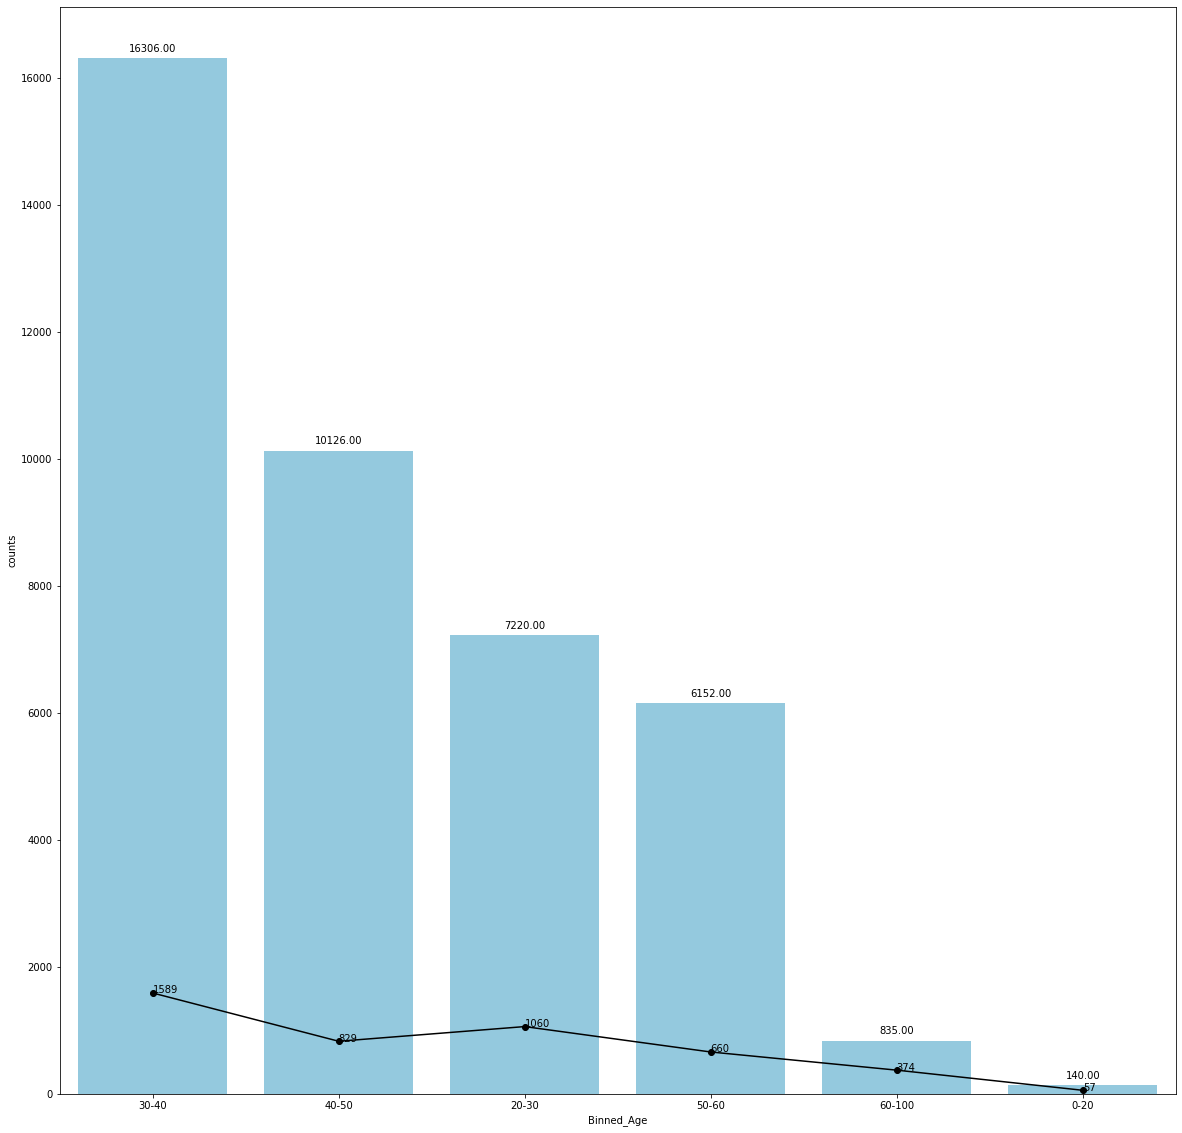

In [14]:
f, (ax1) = plt.subplots(1,1,figsize=(20, 20))
x_1 = pd.DataFrame(df.Binned_Age.value_counts()).reindex(iage, axis=0).dropna()
names_1 = list(x_1.index)
values_1 = list(x_1.Binned_Age)
x_2 = pd.DataFrame(dfyes.Binned_Age.value_counts()).reindex(iage, axis=0).dropna()
names_2 = list(x_2.index)
values_2 = list(x_2.Binned_Age)
ax1.plot(names_2,values_2,linestyle='-', marker='o',color = 'black')
for i, txt in enumerate(values_2):
    ax1.annotate(txt, (names_2[i], values_2[i]))  
splot=sns.barplot(x=names_1, y=values_1,color = 'skyblue',palette=None,ax=ax1)
splot.set(xlabel= 'Binned_Age', ylabel='counts')
for p in splot.patches:
        splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va ='center', xytext = (0, 10), textcoords = 'offset points')


In [15]:
df=pd.get_dummies(df,columns=['Binned_Age'])
#Get updated Shape
print(df.shape)

(40779, 65)


<B> As our data is ready and can we used for modelling purpose, divide the data in traing data and testing data

In [16]:
X=df.drop(['y','emp.var.rate','age'], axis=1)
y=df.y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

<H3><B>Fit the Data without scaling the data and check the accuracy</B></H3> 
<ul><li>Random Forest(As Random Forest does not depends on scaling of the data)
    <li>KNN
    <li>Logistic Regression 

<B>Random Forest(Unscaled Data)

In [17]:
#Fit Random Forest Algorithm on Training Data
rand_clf = RandomForestClassifier()
rand_clf.fit(X_train, y_train)
#Predict the result for testing data
y_pred=rand_clf.predict(X_test)
# Print the accuracy from the testing data.
print('Accuracy Score without scaling the data and using Random Forest',accuracy_score(y_pred, y_test))

Accuracy Score without scaling the data and using Random Forest 0.8887690044139284


In [18]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix without scaling the data and using Random Forest\n',cm)

Confusion Matrix without scaling the data and using Random Forest
 [[8731  333]
 [ 801  330]]


In [19]:
print('Classifiaction Report without scaling the data and using Random Forest\n',classification_report(y_test, y_pred))

Classifiaction Report without scaling the data and using Random Forest
               precision    recall  f1-score   support

           0       0.92      0.96      0.94      9064
           1       0.50      0.29      0.37      1131

    accuracy                           0.89     10195
   macro avg       0.71      0.63      0.65     10195
weighted avg       0.87      0.89      0.88     10195



<B> KNN(Unscaled Data)

In [20]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)
print('Accuracy Score without scaling the data and using KNN',accuracy_score(y_pred, y_test))

Accuracy Score without scaling the data and using KNN 0.8944580676802354


In [21]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix without scaling the data and using KNN\n',cm)

Confusion Matrix without scaling the data and using KNN
 [[8786  278]
 [ 798  333]]


In [22]:
print('Classifiaction Report without scaling the data and using KNN\n',classification_report(y_test, y_pred))

Classifiaction Report without scaling the data and using KNN
               precision    recall  f1-score   support

           0       0.92      0.97      0.94      9064
           1       0.55      0.29      0.38      1131

    accuracy                           0.89     10195
   macro avg       0.73      0.63      0.66     10195
weighted avg       0.88      0.89      0.88     10195



<B>Logistic Regression(Unscaled Data)

In [23]:
lr_clf = LogisticRegression(max_iter=1000)
# Fit the model on the trainng data.
lr_clf.fit(X_train, y_train)
y_pred=lr_clf.predict(X_test)
# Print the accuracy from the testing data.
print('Accuracy Score without scaling the data and using Logistic Regression',accuracy_score(y_pred, y_test))

Accuracy Score without scaling the data and using Logistic Regression 0.9005394801373222


In [24]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix without scaling the data and using Logistic Regression\n',cm)

Confusion Matrix without scaling the data and using Logistic Regression
 [[8954  110]
 [ 904  227]]


In [25]:
print('Classifiaction Report without scaling the data and using Logistic Regression\n',classification_report(y_test, y_pred))

Classifiaction Report without scaling the data and using Logistic Regression
               precision    recall  f1-score   support

           0       0.91      0.99      0.95      9064
           1       0.67      0.20      0.31      1131

    accuracy                           0.90     10195
   macro avg       0.79      0.59      0.63     10195
weighted avg       0.88      0.90      0.88     10195



<B>Get the Roc curve for the results

AUC: 0.7974795403235311


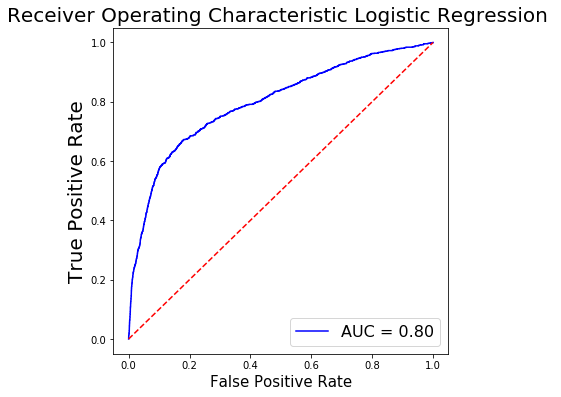

In [26]:
from sklearn import metrics
fig, ax = plt.subplots(figsize = (6,6))
probs = lr_clf.predict_proba(X_test)
preds = probs[:,1]
fprrfc, tprrfc, thresholdrfc = metrics.roc_curve(y_test, preds)
roc_aucrfc = metrics.auc(fprrfc, tprrfc)

ax.plot(fprrfc, tprrfc, 'b', label = 'AUC = %0.2f' % roc_aucrfc)
ax.plot([0, 1], [0, 1],'r--')
ax.set_title('Receiver Operating Characteristic Logistic Regression ',fontsize=20)
ax.set_ylabel('True Positive Rate',fontsize=20)
ax.set_xlabel('False Positive Rate',fontsize=15)
ax.legend(loc = 'lower right', prop={'size': 16})
#Get the AUC score
print("AUC: {}".format(roc_auc_score(y_test, preds)))
plt.subplots_adjust(wspace=1)

Logistic: f1=0.309 auc=0.426


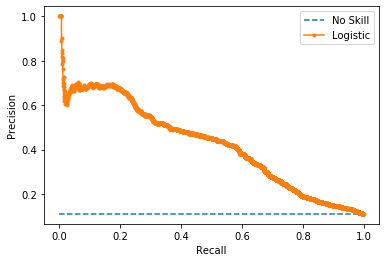

In [27]:
lr_probs=lr_clf.predict_proba(X_test)[:,1]
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, y_pred), auc(lr_recall,lr_precision)
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recall,lr_precision, marker='.', label='Logistic')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

In [28]:
#Adjust the threshold to 0.20
THRESHOLD = 0.20
#y_pred=clf.predict(X_test)
y_pred=np.where(lr_clf.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)
# Print the accuracy from the testing data.
print('Accuracy Score without scaling the data and using Logistic Regression with updated threshold',accuracy_score(y_pred, y_test))

Accuracy Score without scaling the data and using Logistic Regression with updated threshold 0.8713094654242276


In [29]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix without scaling the data and using Logistic Regression with updated threshold\n',cm)

Confusion Matrix without scaling the data and using Logistic Regression with updated threshold
 [[8273  791]
 [ 521  610]]


In [30]:
print('Classifiaction Report without scaling the data and using Logistic Regression with updated threshold\n',classification_report(y_test, y_pred))

Classifiaction Report without scaling the data and using Logistic Regression with updated threshold
               precision    recall  f1-score   support

           0       0.94      0.91      0.93      9064
           1       0.44      0.54      0.48      1131

    accuracy                           0.87     10195
   macro avg       0.69      0.73      0.70     10195
weighted avg       0.88      0.87      0.88     10195



<B>For this project it is important to have good recall and F1 score. Therefore there is need to improve recall score</B>

from sklearn.cluster import KMeans
x = df.drop(['Binned_Age','Binned_Emp_Var_Rate','y'], axis=1).values
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

range_n_clusters = list (range(2,10))
print ("Number of clusters from 2 to 9: \n", range_n_clusters)

from sklearn.metrics import silhouette_score
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(x)
    centers = clusterer.cluster_centers_

    score = silhouette_score(x, preds)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

<H3>Scale the Data and then split again</H3>

In [31]:
X = df.drop(['age','y','emp.var.rate'], axis=1)
y=df.y
scaler = preprocessing.StandardScaler().fit(X)
X_scaled=scaler.transform(X) 

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=1)

<B>Here going forward, X_train and X_test will be our scaled data. For Scaled data, we will be using below algorithms</B>
<ul><li>Random Forest
    <li>KNN
    <li>Logistic Regression 
    <li>SVM   

<B>Random Forest Scaled Data

In [33]:
rand_clf1 = RandomForestClassifier()
rand_clf1.fit(X_train, y_train)
# Print the accuracy from the testing data.
y_pred=rand_clf1.predict(X_test)
print('Accuracy Score of Random Forest is',accuracy_score(y_pred, y_test))
f1 = f1_score(y_test, y_pred)
print('Random Forest: f1-score=%.3f' % (f1))

Accuracy Score of Random Forest is 0.8889651790093183
Random Forest: f1-score=0.370


In [34]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[8731  333]
 [ 799  332]]


In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      9064
           1       0.50      0.29      0.37      1131

    accuracy                           0.89     10195
   macro avg       0.71      0.63      0.65     10195
weighted avg       0.87      0.89      0.88     10195



<B>KNN(Scaled Data)

In [36]:
knn1 = KNeighborsClassifier(n_neighbors=3)
knn1.fit(X_train, y_train)
#fit the data
y_pred=knn1.predict(X_test)
print('Accuracy Score scaling the data and using KNN',accuracy_score(y_pred, y_test))
f1 = f1_score(y_test, y_pred)
print('KNN: f1-score=%.3f' % (f1))

Accuracy Score scaling the data and using KNN 0.8805296714075527
KNN: f1-score=0.320


In [37]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[8691  373]
 [ 845  286]]


In [38]:
print('Classification Report after scaling the data and using KNN\n',classification_report(y_test, y_pred))

Classification Report after scaling the data and using KNN
               precision    recall  f1-score   support

           0       0.91      0.96      0.93      9064
           1       0.43      0.25      0.32      1131

    accuracy                           0.88     10195
   macro avg       0.67      0.61      0.63     10195
weighted avg       0.86      0.88      0.87     10195



<B>Logistic Regression with Scaled Data

In [39]:
lr_clf1 = LogisticRegression(max_iter=1000)
# Fit the model on the trainng data.
lr_clf1.fit(X_train, y_train)
y_pred=lr_clf1.predict(X_test)
# Print the accuracy from the testing data.
print('Accuracy Score with scaling the data and using Logistic Regression',accuracy_score(y_pred, y_test))

Accuracy Score with scaling the data and using Logistic Regression 0.9030897498773909


In [40]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix with scaling the data and using Logistic Regression\n',cm)

Confusion Matrix with scaling the data and using Logistic Regression
 [[8950  114]
 [ 874  257]]


In [41]:
print('Classifiaction Report with scaling the data and using Logistic Regression\n',classification_report(y_test, y_pred))

Classifiaction Report with scaling the data and using Logistic Regression
               precision    recall  f1-score   support

           0       0.91      0.99      0.95      9064
           1       0.69      0.23      0.34      1131

    accuracy                           0.90     10195
   macro avg       0.80      0.61      0.64     10195
weighted avg       0.89      0.90      0.88     10195



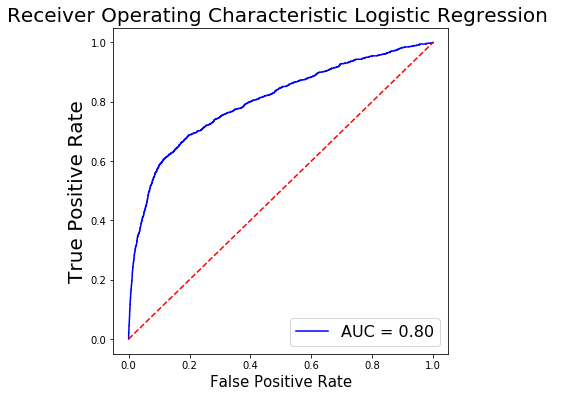

In [42]:
from sklearn import metrics
fig, ax = plt.subplots(figsize = (6,6))
probs = lr_clf1.predict_proba(X_test)
preds = probs[:,1]
fprrfc, tprrfc, thresholdrfc = metrics.roc_curve(y_test, preds)
roc_aucrfc = metrics.auc(fprrfc, tprrfc)

ax.plot(fprrfc, tprrfc, 'b', label = 'AUC = %0.2f' % roc_aucrfc)
ax.plot([0, 1], [0, 1],'r--')
ax.set_title('Receiver Operating Characteristic Logistic Regression ',fontsize=20)
ax.set_ylabel('True Positive Rate',fontsize=20)
ax.set_xlabel('False Positive Rate',fontsize=15)
ax.legend(loc = 'lower right', prop={'size': 16})

plt.subplots_adjust(wspace=1)

In [43]:
#Get the AUC score
print("AUC: {}".format(roc_auc_score(y_test, preds)))

AUC: 0.8020504353363409


Logistic: f1=0.342 auc=0.462


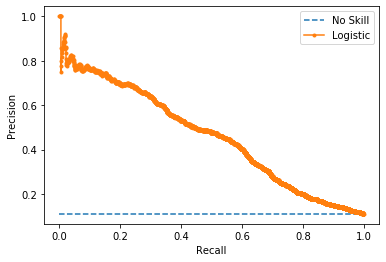

In [44]:
lr_probs=lr_clf1.predict_proba(X_test)[:,1]
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, y_pred), auc(lr_recall,lr_precision)
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recall,lr_precision, marker='.', label='Logistic')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

In [45]:
THRESHOLD = 0.20
#y_pred=clf.predict(X_test)
y_pred=np.where(lr_clf1.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)
print('Accuracy Score by after scaling the data and using logistic regression',accuracy_score(y_pred, y_test))
f1 = f1_score(y_test, y_pred)
print('Logistic Regression: f1-score=%.3f' % (f1))

Accuracy Score by after scaling the data and using logistic regression 0.8698381559588033
Logistic Regression: f1-score=0.492


In [46]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[8225  839]
 [ 488  643]]


In [47]:
print('Classification Report after scaling the data and using Logistic regression\n',classification_report(y_test, y_pred))

Classification Report after scaling the data and using Logistic regression
               precision    recall  f1-score   support

           0       0.94      0.91      0.93      9064
           1       0.43      0.57      0.49      1131

    accuracy                           0.87     10195
   macro avg       0.69      0.74      0.71     10195
weighted avg       0.89      0.87      0.88     10195



<B>SVM(Scaled Data)

In [48]:
clf_svm = svm()
clf_svm.fit(X_train, y_train)
y_pred=clf_svm.predict(X_test)
print('Accuracy Score of SVM is',accuracy_score(y_pred, y_test))

Accuracy Score of SVM is 0.8996566944580677


In [49]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[8942  122]
 [ 901  230]]


In [50]:
print('Classifiaction Report with scaling the data and using Logistic Regression\n',classification_report(y_test, y_pred))

Classifiaction Report with scaling the data and using Logistic Regression
               precision    recall  f1-score   support

           0       0.91      0.99      0.95      9064
           1       0.65      0.20      0.31      1131

    accuracy                           0.90     10195
   macro avg       0.78      0.59      0.63     10195
weighted avg       0.88      0.90      0.88     10195



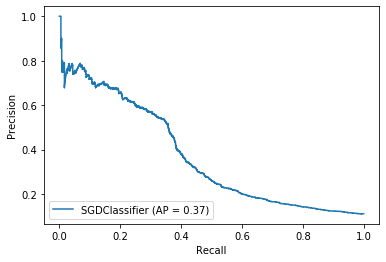

In [51]:
disp=plot_precision_recall_curve(clf_svm, X_test, y_test)


<H3>Still Recall score for "yes" is not improved as expected, Need to check more on improving recall score by trying regularization method</H3> 
<UL><LI>Ridge Regression

<B>Ridge_Regression

In [52]:
ridge=RidgeClassifier()
ridge.fit(X_train, y_train)
y_pred=ridge.predict(X_test)
print('Accuracy Score of Ridge Regression is',accuracy_score(y_pred, y_test))

Accuracy Score of Ridge Regression is 0.9013241785188818


In [53]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[8960  104]
 [ 902  229]]


In [54]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      9064
           1       0.69      0.20      0.31      1131

    accuracy                           0.90     10195
   macro avg       0.80      0.60      0.63     10195
weighted avg       0.88      0.90      0.88     10195



<H3>Still there is need to improve Recall Score and F1 Score for the models. There is need to balance data<H3>    

<B>For Balancing data we will use class weight method. Once done we will use below algorithms
    <ul><li>Random Forest
    <li>Logistic Regression 
    <li>SVM  

In [55]:
classes=[1,0]
weights = compute_class_weight('balanced', classes, y=y_train)
weights

C:\Users\Pranay\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass classes=[1, 0] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


array([4.44793485, 0.56332425])

<B>Random Forest(updated class weight)

In [56]:
rand_clf2= RandomForestClassifier(class_weight={0:0.56365827,1:4.4272198})
rand_clf2.fit(X_train, y_train)
# Print the accuracy from the testing data.
y_pred=rand_clf2.predict(X_test)
print('Accuracy Score of Random Forest is',accuracy_score(y_pred, y_test))

Accuracy Score of Random Forest is 0.879941147621383


In [57]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[8636  428]
 [ 796  335]]


In [58]:
print('Classifiaction Report after balancing the data and using Random Forest\n',
      classification_report(y_test, y_pred))

Classifiaction Report after balancing the data and using Random Forest
               precision    recall  f1-score   support

           0       0.92      0.95      0.93      9064
           1       0.44      0.30      0.35      1131

    accuracy                           0.88     10195
   macro avg       0.68      0.62      0.64     10195
weighted avg       0.86      0.88      0.87     10195



59


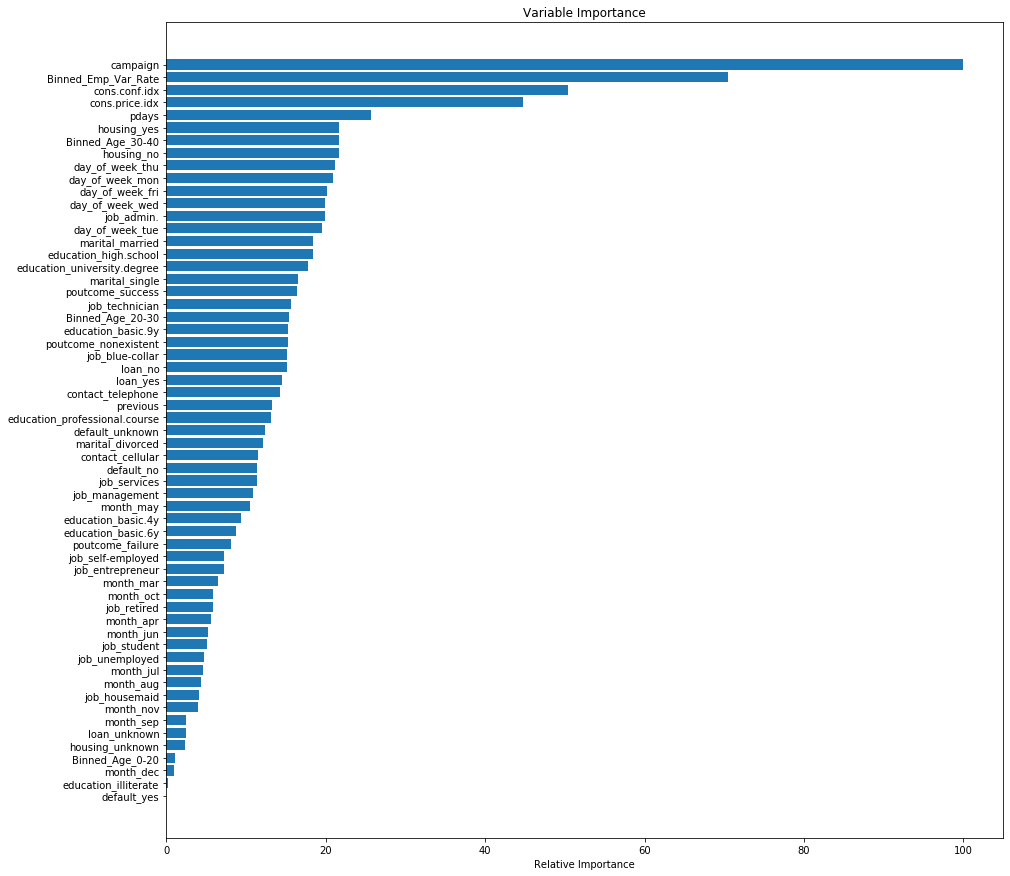

In [59]:
feature_importance = rand_clf2.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:59]
sorted_idx = np.argsort(feature_importance)[:59]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(15,15))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

<B>Plot ROC Curve for Random Forest

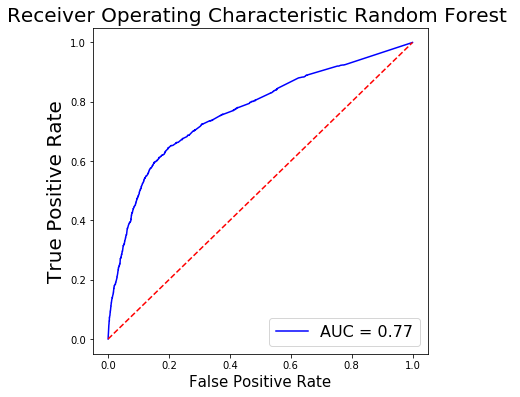

In [60]:
fig, ax = plt.subplots(figsize = (6,6))
probs = rand_clf2.predict_proba(X_test)
preds = probs[:,1]
fprrfc, tprrfc, thresholdrfc = metrics.roc_curve(y_test, preds)
roc_aucrfc = metrics.auc(fprrfc, tprrfc)

ax.plot(fprrfc, tprrfc, 'b', label = 'AUC = %0.2f' % roc_aucrfc)
ax.plot([0, 1], [0, 1],'r--')
ax.set_title('Receiver Operating Characteristic Random Forest ',fontsize=20)
ax.set_ylabel('True Positive Rate',fontsize=20)
ax.set_xlabel('False Positive Rate',fontsize=15)
ax.legend(loc = 'lower right', prop={'size': 16})

plt.subplots_adjust(wspace=1)

In [61]:
#Get the AUC score
print("AUC: {}".format(roc_auc_score(y_test, preds)))

AUC: 0.7670170193605077


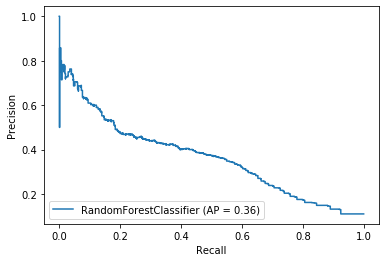

In [62]:
disp=plot_precision_recall_curve(rand_clf2, X_test, y_test)

Logistic: f1=0.354 auc=0.364


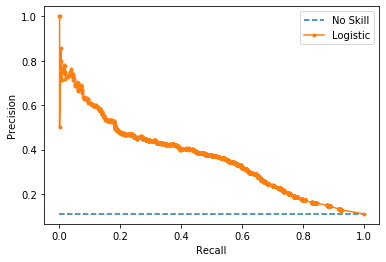

In [63]:
lr_probs=rand_clf2.predict_proba(X_test)[:,1]
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, y_pred), auc(lr_recall,lr_precision)
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recall,lr_precision, marker='.', label='Logistic')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

In [64]:
#update the threshold and then predict the value
THRESHOLD = 0.30
#y_pred=clf.predict(X_test)
y_pred=np.where(rand_clf2.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)
print('Accuracy Score by after balancing the data and using Random Forest',accuracy_score(y_pred, y_test))

Accuracy Score by after balancing the data and using Random Forest 0.8542422756253065


In [65]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[8161  903]
 [ 583  548]]


In [66]:
print('Classifiaction Report after balancing the data and using Random Forest\n',
      classification_report(y_test, y_pred))

Classifiaction Report after balancing the data and using Random Forest
               precision    recall  f1-score   support

           0       0.93      0.90      0.92      9064
           1       0.38      0.48      0.42      1131

    accuracy                           0.85     10195
   macro avg       0.66      0.69      0.67     10195
weighted avg       0.87      0.85      0.86     10195



<B>Logistic Regression (updated class weight) </B>

In [67]:
lr_clf2 = LogisticRegression(class_weight={0:0.56365827,1:4.4272198},max_iter=1000)
# Fit the model on the trainng data.
lr_clf2.fit(X_train, y_train)
y_pred=lr_clf2.predict(X_test)
# Print the accuracy from the testing data.
print('Accuracy Score with scaling the data and using Logistic Regression',accuracy_score(y_pred, y_test))

Accuracy Score with scaling the data and using Logistic Regression 0.8242275625306523


In [68]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix after updating class weight and using Logistic Regression\n',cm)

Confusion Matrix after updating class weight and using Logistic Regression
 [[7674 1390]
 [ 402  729]]


In [69]:
print('Classifiaction Report after balancing the data and using Random Forest\n',
      classification_report(y_test, y_pred))

Classifiaction Report after balancing the data and using Random Forest
               precision    recall  f1-score   support

           0       0.95      0.85      0.90      9064
           1       0.34      0.64      0.45      1131

    accuracy                           0.82     10195
   macro avg       0.65      0.75      0.67     10195
weighted avg       0.88      0.82      0.85     10195



59


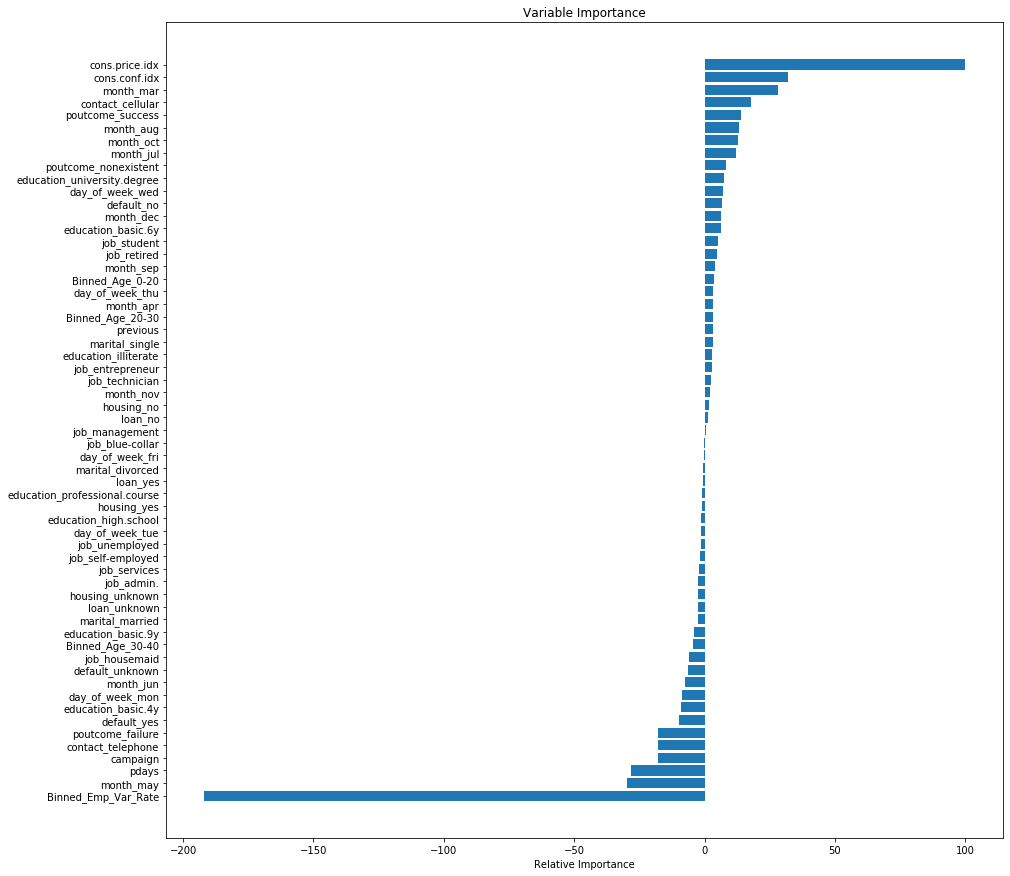

In [70]:
feature_importance = lr_clf2.coef_[0]
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:59]
sorted_idx = np.argsort(feature_importance)[:59]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(15,15))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

<B>Plot Ruc Curve for Logistic Regression

AUC: 0.8023740989509318


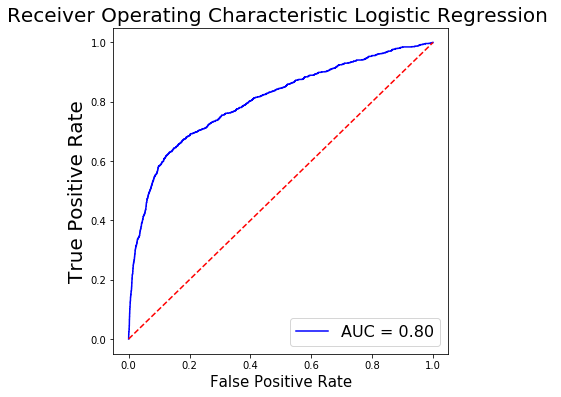

In [71]:
fig, ax = plt.subplots(figsize = (6,6))
probs = lr_clf2.predict_proba(X_test)
preds = probs[:,1]
fprrfc, tprrfc, thresholdrfc = metrics.roc_curve(y_test, preds)
roc_aucrfc = metrics.auc(fprrfc, tprrfc)

ax.plot(fprrfc, tprrfc, 'b', label = 'AUC = %0.2f' % roc_aucrfc)
ax.plot([0, 1], [0, 1],'r--')
ax.set_title('Receiver Operating Characteristic Logistic Regression ',fontsize=20)
ax.set_ylabel('True Positive Rate',fontsize=20)
ax.set_xlabel('False Positive Rate',fontsize=15)
ax.legend(loc = 'lower right', prop={'size': 16})
#Get the AUC score
print("AUC: {}".format(roc_auc_score(y_test, preds)))
plt.subplots_adjust(wspace=1)

Logistic: f1=0.449 auc=0.454


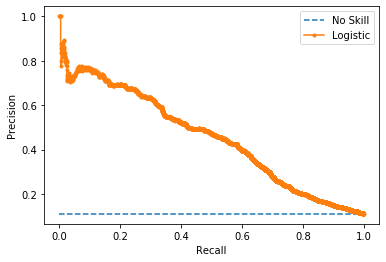

In [72]:
lr_probs=lr_clf2.predict_proba(X_test)[:,1]
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, y_pred), auc(lr_recall,lr_precision)
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recall,lr_precision, marker='.', label='Logistic')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

In [73]:
#update the threshold and then predict the value
THRESHOLD = 0.65
#y_pred=clf.predict(X_test)
y_pred=np.where(lr_clf2.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)
print('Accuracy Score by after balancing the data and using Random Forest',accuracy_score(y_pred, y_test))

Accuracy Score by after balancing the data and using Random Forest 0.8698381559588033


In [74]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[8239  825]
 [ 502  629]]


In [75]:
print('Classifiaction Report after balancing the data and using Random Forest\n',
      classification_report(y_test, y_pred))

Classifiaction Report after balancing the data and using Random Forest
               precision    recall  f1-score   support

           0       0.94      0.91      0.93      9064
           1       0.43      0.56      0.49      1131

    accuracy                           0.87     10195
   macro avg       0.69      0.73      0.71     10195
weighted avg       0.89      0.87      0.88     10195



In [76]:
clf_svm1 = svm(class_weight={0:0.56365827,1:4.4272198})
clf_svm1.fit(X_train, y_train)
y_pred=clf_svm1.predict(X_test)
print('Accuracy Score of SVM is',accuracy_score(y_pred, y_test))

Accuracy Score of SVM is 0.7945071113290829


In [77]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix after updating class weight and using Logistic Regression\n',cm)

Confusion Matrix after updating class weight and using Logistic Regression
 [[7373 1691]
 [ 404  727]]


In [78]:
print('Classifiaction Report after balancing the data and using Random Forest\n',
      classification_report(y_test, y_pred))

Classifiaction Report after balancing the data and using Random Forest
               precision    recall  f1-score   support

           0       0.95      0.81      0.88      9064
           1       0.30      0.64      0.41      1131

    accuracy                           0.79     10195
   macro avg       0.62      0.73      0.64     10195
weighted avg       0.88      0.79      0.82     10195



<B>Use Xgboost by balancing data</B>

In [79]:
from xgboost import XGBClassifier
scale_pos_weight = 26980/3435
gbc = XGBClassifier(scale_pos_weight=scale_pos_weight)

In [80]:
gbc.fit(X_train, y_train)
y_pred=gbc.predict(X_test)
print('Accuracy Score of Xgboost is',accuracy_score(y_pred, y_test))

Accuracy Score of Xgboost is 0.8356056890632663


In [81]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix after updating class weight and using Xgboost\n',cm)

Confusion Matrix after updating class weight and using Xgboost
 [[7795 1269]
 [ 407  724]]


In [82]:
print('Classifiaction Report after balancing the data and using Xgboost\n',
      classification_report(y_test, y_pred))

Classifiaction Report after balancing the data and using Xgboost
               precision    recall  f1-score   support

           0       0.95      0.86      0.90      9064
           1       0.36      0.64      0.46      1131

    accuracy                           0.84     10195
   macro avg       0.66      0.75      0.68     10195
weighted avg       0.89      0.84      0.85     10195



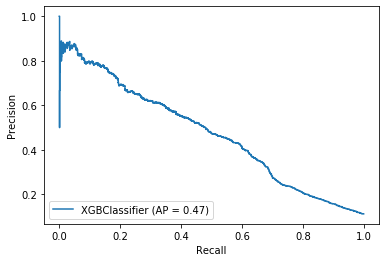

In [83]:
disp=plot_precision_recall_curve(gbc, X_test, y_test)

<H2>Still we need to work on improving F1 score</H2>
<B> We will need to look for feature reduction techniques<B>
    <UL><LI>PCA>>KNN

In [84]:
pca=PCA(n_components=2)
pca.fit(X_train)
X_transformed=pca.transform(X_train)

In [85]:
X_test_Transformed=pca.transform(X_test)

In [86]:
knn2 = KNeighborsClassifier(n_neighbors=3)
knn2.fit(X_transformed, y_train)
#fit the data
y_pred=knn2.predict(X_test_Transformed)
print('Accuracy Score scaling the data and using KNN',accuracy_score(y_pred, y_test))

Accuracy Score scaling the data and using KNN 0.8824914173614516


In [87]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix after updating class weight and using Logistic Regression\n',cm)

Confusion Matrix after updating class weight and using Logistic Regression
 [[8737  327]
 [ 871  260]]


In [88]:
print('Classifiaction Report after balancing the data and using Random Forest\n',
      classification_report(y_test, y_pred))

Classifiaction Report after balancing the data and using Random Forest
               precision    recall  f1-score   support

           0       0.91      0.96      0.94      9064
           1       0.44      0.23      0.30      1131

    accuracy                           0.88     10195
   macro avg       0.68      0.60      0.62     10195
weighted avg       0.86      0.88      0.87     10195



In [89]:
y_train.value_counts()

0    27146
1     3438
Name: y, dtype: int64

In [90]:
udf.shape

(40779, 18)

df['not_important_month']=0
df.loc[((df['month_apr'] == 1)|(df['month_aug']==1) | (df['month_jul']==1 ) | (df['month_nov']==1) | (df['month_sep']==1)),
      'not_important_month']=1
to_drop=['month_apr','month_aug','month_jul','month_nov','month_sep']
df.drop(to_drop, axis = 1,inplace=True)

In [91]:
udf['Education_lt_09'],udf['Education_09'],udf['Education_High_School'],udf['Education_University_Degree'],udf['Education_Professional_Course']=0,0,0,0,0
udf.loc[(udf['education'] == 'illiterate') | (udf['education'] == 'basic.4y') |  (udf['education'] == 'basic.6y'),
       'Education_lt_09']=1
udf.loc[(udf['education'] == 'basic.9y'),'Education_09']=1
udf.loc[(udf['education'] == 'high.school'),'Education_High_School']=1
udf.loc[(udf['education'] == 'university.degree'),'Education_University_Degree']=1
udf.loc[(udf['education'] == 'professional.course'),'Education_Professional_Course']=1
udf.drop(['education'], axis=1, inplace=True)

In [92]:
udf['Quarter1'],udf['Quarter2'],udf['Quarter3'],udf['Quarter4']=0,0,0,0
udf.loc[(udf['month'] == 'jan') | (udf['month'] == 'feb') |  (udf['month'] == 'mar'),'Quarter1']=1
udf.loc[(udf['month'] == 'apr') | (udf['month'] == 'may') |  (udf['month'] == 'jun'),'Quarter2']=1
udf.loc[(udf['month'] == 'jul') | (udf['month'] == 'aug') |  (udf['month'] == 'sep'),'Quarter3']=1
udf.loc[(udf['month'] == 'oct') | (udf['month'] == 'nov') |  (udf['month'] == 'dec'),'Quarter4']=1
udf.drop(['month'], axis=1, inplace=True)

In [93]:
udf['Job_No_Income'],udf['Job_Self_Employed'],udf['Job_Management'],udf['Job_Services'],udf['Job_Admin'],udf['Job_blue_collar'],udf['Job_Technician']=0,0,0,0,0,0,0
udf.loc[(udf['job'] == 'housemaid') | (udf['job'] == 'unemployed') | (udf['job'] == 'retired') | (udf['job'] == 'student')
        ,'Job_No_Income']=1
udf.loc[(udf['job'] == 'self-employed') | (udf['job'] == 'entrepreneur'),'Job_Self_Employed']=1
udf.loc[(udf['job'] == 'management'),'Job_Management']=1
udf.loc[(udf['job'] == 'services'),'Job_Services']=1
udf.loc[(udf['job'] == 'admin.'),'Job_Admin']=1
udf.loc[(udf['job'] == 'blue-collar'),'Job_blue_collar']=1
udf.loc[(udf['job'] == 'technician'),'Job_Technician']=1
udf.drop(['job'], axis=1, inplace=True)


In [94]:
only_obj=udf.select_dtypes(include=['object'])
only_obj.drop(['y'],axis=1,inplace=True)
col=only_obj.columns
#Do One Hot encoding for the objects columns
udf=pd.get_dummies(udf,columns=col)
#Transform Dependent Variable values
udf.y.replace({'yes':1,'no':0},inplace=True)
#Get updated data types of all the columns
udf.dtypes

C:\Users\Pranay\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


age                                int64
campaign                           int64
pdays                              int64
previous                           int64
emp.var.rate                     float64
cons.price.idx                   float64
cons.conf.idx                    float64
y                                  int64
Education_lt_09                    int64
Education_09                       int64
Education_High_School              int64
Education_University_Degree        int64
Education_Professional_Course      int64
Quarter1                           int64
Quarter2                           int64
Quarter3                           int64
Quarter4                           int64
Job_No_Income                      int64
Job_Self_Employed                  int64
Job_Management                     int64
Job_Services                       int64
Job_Admin                          int64
Job_blue_collar                    int64
Job_Technician                     int64
marital_divorced

In [95]:
#Group Age Columns
udf['Binned_Age']=pd.cut(
    udf['age'],
    bins=[-np.inf,20,30,40,50,60,np.inf],
    labels=['0-20','20-30','30-40','40-50','50-60','60-100']
)
udf.drop(['age'], axis=1, inplace=True)

In [96]:
#Group Emp_Var_Rate columns
udf['Binned_Emp_Var_Rate']=pd.cut(
    udf['emp.var.rate'],
    bins=[-np.inf,-3.5,-2.5,-1.5,-0.5,0.5,1.5,np.inf],
    labels=[-4,-3,-2,-1,0,1,2]
)
udf.drop(['emp.var.rate'], axis=1, inplace=True)

In [97]:
#df['euribor3m']=df['euribor3m'].round(1)
udf['cons.price.idx']=udf['cons.price.idx'].round(2)

In [98]:
udf=pd.get_dummies(udf,columns=['Binned_Age'])
#Get updated Shape
print(udf.shape)

(40779, 51)


In [99]:
X = udf.drop(['y'], axis=1)
y=udf.y
scaler = preprocessing.StndardScaler().fit(X)
X_scaled=scaler.transform(X) 

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=1)

In [101]:
rand_clf1 = RandomForestClassifier(class_weight={0:0.56365827,1:4.4272198})
rand_clf1.fit(X_train, y_train)
# Print the accuracy from the testing data.
y_pred=rand_clf1.predict(X_test)
print('Accuracy Score of Random Forest is',accuracy_score(y_pred, y_test))
f1 = f1_score(y_test, y_pred)
print('Random Forest: f1-score=%.3f' % (f1))

Accuracy Score of Random Forest is 0.8776851397743992
Random Forest: f1-score=0.345


In [102]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[8619  445]
 [ 802  329]]


In [103]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      9064
           1       0.43      0.29      0.35      1131

    accuracy                           0.88     10195
   macro avg       0.67      0.62      0.64     10195
weighted avg       0.86      0.88      0.87     10195



50


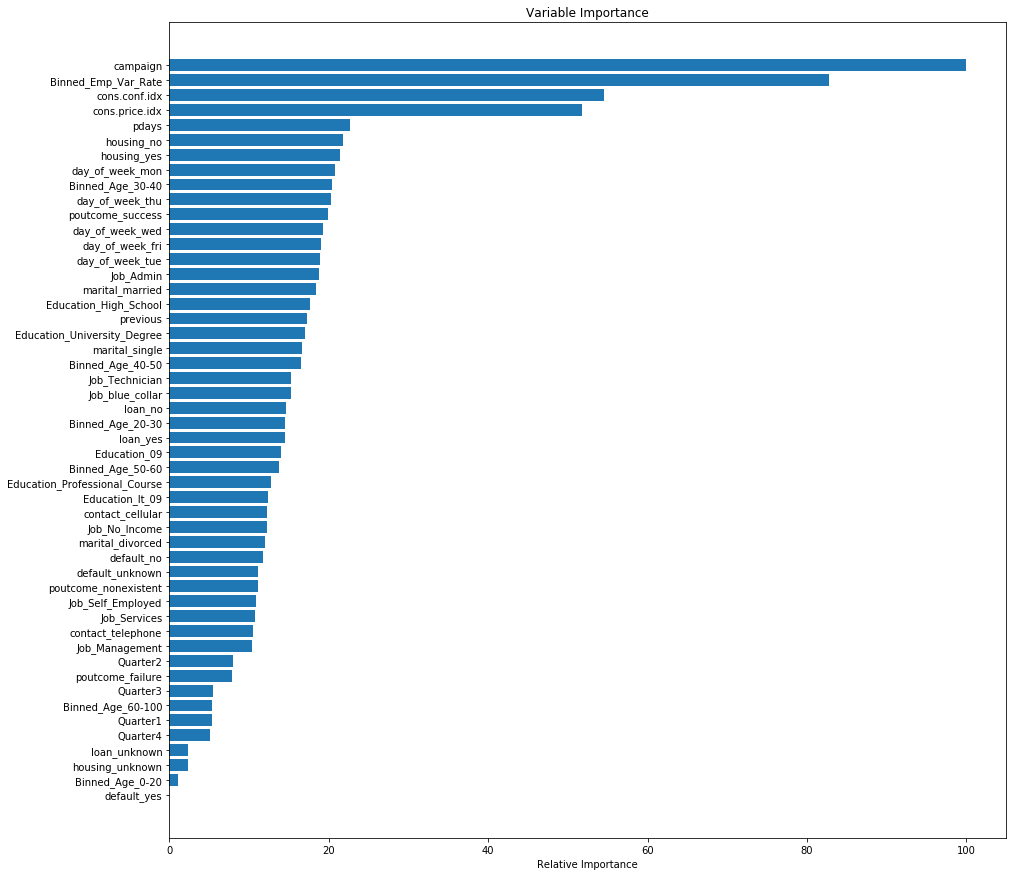

In [104]:
feature_importance = rand_clf1.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:50]
sorted_idx = np.argsort(feature_importance)[:50]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(15,15))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

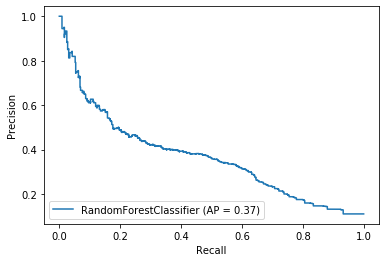

In [105]:
disp=plot_precision_recall_curve(rand_clf1, X_test, y_test)

In [106]:
#update the threshold and then predict the value
THRESHOLD = 0.20
#y_pred=clf.predict(X_test)
y_pred=np.where(rand_clf1.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)
print('Accuracy Score by after balancing the data and using Random Forest',accuracy_score(y_pred, y_test))

Accuracy Score by after balancing the data and using Random Forest 0.8261893084845513


In [107]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[7775 1289]
 [ 483  648]]


In [108]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.86      0.90      9064
           1       0.33      0.57      0.42      1131

    accuracy                           0.83     10195
   macro avg       0.64      0.72      0.66     10195
weighted avg       0.87      0.83      0.84     10195



In [109]:
lr_clf2 = LogisticRegression(class_weight={0:0.56365827,1:4.4272198},max_iter=1000)
# Fit the model on the trainng data.
lr_clf2.fit(X_train, y_train)
y_pred=lr_clf2.predict(X_test)
# Print the accuracy from the testing data.
print('Accuracy Score with scaling the data and using Logistic Regression',accuracy_score(y_pred, y_test))

Accuracy Score with scaling the data and using Logistic Regression 0.8107896027464443


In [110]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix after updating class weight and using Logistic Regression\n',cm)

Confusion Matrix after updating class weight and using Logistic Regression
 [[7523 1541]
 [ 388  743]]


In [111]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.83      0.89      9064
           1       0.33      0.66      0.44      1131

    accuracy                           0.81     10195
   macro avg       0.64      0.74      0.66     10195
weighted avg       0.88      0.81      0.84     10195



Logistic: f1=0.435 auc=0.459


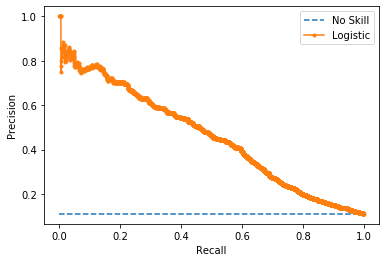

In [112]:
lr_probs=lr_clf2.predict_proba(X_test)[:,1]
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, y_pred), auc(lr_recall,lr_precision)
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recall,lr_precision, marker='.', label='Logistic')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

In [113]:
#update the threshold and then predict the value
THRESHOLD = 0.58
#y_pred=clf.predict(X_test)
y_pred=np.where(lr_clf2.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)
print('Accuracy Score by after balancing the data and using Random Forest',accuracy_score(y_pred, y_test))

Accuracy Score by after balancing the data and using Random Forest 0.8635605689063266


In [114]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[8156  908]
 [ 483  648]]


In [115]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92      9064
           1       0.42      0.57      0.48      1131

    accuracy                           0.86     10195
   macro avg       0.68      0.74      0.70     10195
weighted avg       0.89      0.86      0.87     10195



In [116]:
clf_svm1 = svm(class_weight={0:0.56365827,1:4.4272198})
clf_svm1.fit(X_train, y_train)
y_pred=clf_svm1.predict(X_test)
print('Accuracy Score of SVM is',accuracy_score(y_pred, y_test))

Accuracy Score of SVM is 0.7889161353604708


In [117]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix after updating class weight and using Logistic Regression\n',cm)

Confusion Matrix after updating class weight and using Logistic Regression
 [[7324 1740]
 [ 412  719]]


In [118]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.81      0.87      9064
           1       0.29      0.64      0.40      1131

    accuracy                           0.79     10195
   macro avg       0.62      0.72      0.64     10195
weighted avg       0.87      0.79      0.82     10195



In [119]:
from xgboost import XGBClassifier
scale_pos_weight = 26980/3435
gbc = XGBClassifier(scale_pos_weight=scale_pos_weight)

In [120]:
gbc.fit(X_train, y_train)
y_pred=gbc.predict(X_test)
print('Accuracy Score of Xgboost is',accuracy_score(y_pred, y_test))

Accuracy Score of Xgboost is 0.8367827366356057


In [121]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix after updating class weight and using Xgboost\n',cm)

Confusion Matrix after updating class weight and using Xgboost
 [[7799 1265]
 [ 399  732]]


In [122]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.86      0.90      9064
           1       0.37      0.65      0.47      1131

    accuracy                           0.84     10195
   macro avg       0.66      0.75      0.69     10195
weighted avg       0.89      0.84      0.86     10195



In [ ]:
housemaid,unemployed,retired,student   
(self-employed,entrepreneur) 
(management,services) 
admin.
blue-collar 
technician 

In [ ]:
feature_importance = rand_clf2.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:59]
sorted_idx = np.argsort(feature_importance)[:59]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(15,15))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [ ]:
#the grid of parameters to search over
Cs = [0.001, 0.1, 1, 10, 100]
param_grid = {'C': Cs}
from sklearn.model_selection import GridSearchCV
clf = LogisticRegression(max_iter=1000)
clf_cv=GridSearchCV(clf,param_grid,cv=5)
clf_cv.fit(X_train, y_train)
print("Tuned Logistic Regression Parameters: {}".format(clf_cv.best_params_))
print("Best score is {}".format(clf_cv.best_score_))

In [ ]:
clf_best=LogisticRegression(C=10,max_iter=1000)
clf_best.fit(X_train, y_train)

In [ ]:
THRESHOLD = 0.20
#y_pred=clf.predict(X_test)
y_pred=np.where(clf_best.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix without scaling the data and using Logistic Regression\n',cm)

In [ ]:
print('Accuracy Score without scaling the data and using Logistic Regression',accuracy_score(y_pred, y_test))
f1 = f1_score(y_test, y_pred, average='weighted')
print('Logistic Regression without scaling: f1-score=%.3f' % (f1))

In [ ]:
print('Classifiaction Report without scaling the data and using Logistic Regression\n',classification_report(y_test, y_pred))

<B>KNN

In [ ]:
param_grid={'n_neighbors':np.arange(1,50)}
knn=KNeighborsClassifier()
knn_cv=GridSearchCV(knn,param_grid,cv=5)
#knn_cv.fit(X_train,y_train)
#print("Tuned KNN Parameters: {}".format(knn_cv.best_params_))
#print("Best score is {}".format(knn_cv.best_score_))

In [ ]:
#knn_cv.fit(X_train,y_train)

In [ ]:
#print("Tuned KNN Parameters: {}".format(knn_cv.best_params_))
#print("Best score is {}".format(knn_cv.best_score_))

In [ ]:
#knn = KNeighborsClassifier(n_neighbors=30)
#knn.fit(X_train, y_train)

In [ ]:
#y_pred=knn.predict(X_test)
#print('Accuracy Score without scaling the data and using KNN',accuracy_score(y_pred, y_test))
#f1 = f1_score(y_test, y_pred, average='weighted')
#print('KNN: f1-score=%.3f' % (f1))

In [ ]:
#cm = confusion_matrix(y_test, y_pred)
#print(cm)

In [ ]:
#print('Classification Report after scaling the data and using KNN\n',classification_report(y_test, y_pred))

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)] #this
# Number of features to consider at every split
max_features = ['auto', 'sqrt'] 
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)] #this
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
clf = RandomForestClassifier()
clf_cv=GridSearchCV(clf,random_grid,cv=5)

In [ ]:
clf_cv.fit(X_train,y_train)